In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class mx():
    def __init__(self, n, p):
        self.matrix = [[0 for _ in range(n)] for _ in range(n)]
        self.degs=[0 for _ in range(n)]
        self.cols=[0 for _ in range(n)]
        self.alr_col=0
        self.Ksi=0
        self.overflow=0
        self.average_deg=0
        self.rnd_init(n, p)
        self.deg(n)
        self.av_deg(n)
    
    def get(self,i,j):
        if(i>=j):
            return self.matrix[j][i]
        else:
            return self.matrix[i][j]
    def wr(self,i,j,x):
        if(i>=j):
            self.matrix[j][i]=x
        else:
            self.matrix[i][j]=x
        
    def cng(self,i,j):
        if(i>=j):
            self.matrix[j][i]=(self.matrix[j][i]+1) % 2
        else:
            self.matrix[i][j]=(self.matrix[i][j]+1) % 2
    
    def rnd_init(self, n, dense):
        while True:
            self.matrix = [[0 for _ in range(n)] for _ in range(n)]
            for i in range(n):
                for j in range(i+1, n):
                    x=random.uniform(0, 1)
                    if(x>(1-dense)):
                        self.cng(i, j)
                        
            nei_mx=self.matrix
            graph=nx.from_numpy_array(np.array(nei_mx))
            if(nx.is_connected(graph)):      
                break;
                    
    def p(self, n):
        for i in range(n):
            print(self.matrix[i])  
    
    def num(self, n):
        s=0
        for i in range(n):
            for j in range(n):
                s+=self.matrix[i][j]
        return s
        
    def deg(self, n):
        for j in range(n):
            sum=0
            for i in range(n):
                sum+=self.matrix[i][j]
                sum+=self.matrix[j][i]
            self.degs[j]=sum
        self.Ksi=max(self.degs)+1
        
    def av_deg(self, n):
        self.average_deg=sum(self.degs)/n
        
    def free_cols(self, k, n):
        free_cols=[1 for i in range(0, max(self.cols))]
        neibs = [0 for _ in range(n)]
        for p in range(k):
            neibs[p]=self.get(p, k)
        neibs = [(neibs[i]+self.matrix[k][i]) for i in range(n)]
        
        for i, j in enumerate(neibs):
            if j == 1:
                #niepokolorowany sąsiad
                if(self.cols[i]==0):
                    continue
                else:
                    engaged_col=self.cols[i]
                    if((free_cols[engaged_col-1])==1):
                        free_cols[engaged_col-1]=0

        return free_cols
        
    def give_high_col(self, i, n):
        if(self.alr_col==0):
            self.cols[i]=self.Ksi
            self.alr_col+=1
        else:
            free_cols=self.free_cols(i, n)
            
            #przydzielenie koloru o o 1 większym numerze
            for j in range(self.Ksi-1):
                free_cols[j]=0
                
            if(max(free_cols)==0):
                self.cols[i]=self.Ksi+1+self.overflow
                self.overflow+=1
            else:
                self.cols[i]=np.argmax(free_cols)+1
            
    def give_min_col(self, i, n):
        free_cols=self.free_cols(i, n)
        if(max(free_cols)==0):
            self.cols[i]=self.Ksi+1+self.overflow
            self.overflow+=1
        self.cols[i]=np.argmax(free_cols)+1
        
    def high_neibs(self, j, order, N, n):
        s=0
        for i in range(n):
            if(self.matrix[i][j]==1 and self.degs[i]>2):
                s+=self.matrix[i][j]
            if(self.matrix[j][i]==1 and self.degs[i]>2):
                s+=self.matrix[j][i]
        return s
        
    def reduce(self, order, N, n):
        high_order=order[0:N]
        for j in range(N):
            high_order[j][1]=self.high_neibs(high_order[j][0], order, N, n)
        
        tmp=(high_order).copy()
        M=0
        for j in range(N):
            if(tmp[j][1]>M):
                M=tmp[j][1]
                
        neibs_num=[high_order[j][1] for j in range(N)]
        vert_names=[high_order[j][0] for j in range(N)]
        
        for j in range(N):
            a=np.argmin(neibs_num)
            #nazwa wierzchołka z największą liczbą sąsiadów wysokiego stopnia
            high_order[j][0]=vert_names[a]
            #liczba sąsiadów wysokiego stopnia
            high_order[j][1]=neibs_num[a]
            #ustawianie liczby sąsiadów wysokiego stopnia na M
            neibs_num[a]=M+1
        #kolejność malejąca względem liczby sąsiadów wysokiego stopnia
        for i in range(N):
            self.give_min_col(high_order[i][0], n)
    
    def check(self, n):
        flag=True
        for i in range(n):
            curr_col=self.cols[i]
            for j in range(n):
                if(i!=j):
                    if(self.matrix[i][j]==1 or self.matrix[j][i]==1):
                        if(curr_col==self.cols[j]):
                            flag=False
        return flag
            
        
    def chrom_sum(self):
        return sum(self.cols)

TWORZENIE GRAFU

In [3]:
n=25
p=0.1
g = mx(n, p)

In [4]:
g.p(n)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0,

In [5]:
#LICZBA KRAWĘDZI GRAFU G
g.num(n)

46

In [6]:
#OBECNE POKOLOROWANIE GRAFU 
g.cols

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ALGORYTM ZAPROPONOWANY W PROJEKCIE, ZACZYNANIE OD WIERZCHOŁKÓW WYSOKIEGO STOPNIA

In [7]:
#Funkcja znajdująca przybliżoną sumę chromatyczną zgodnie z zaproponowanym algorytmem dla grafu g
def auto_chrom_sum2(G):
    
    g=G
    n=len(g.matrix[0])
    
    tmp=(g.degs).copy()
    order=[[0, 0] for _ in range(n)]
    for i in range(n):
        order[i][0]=np.argmax(tmp)
        order[i][1]=max(tmp)
        tmp[order[i][0]]=-1
    
    
    ksi=order[0][1]+1
    N=0
    for i in range(n):
        if(order[i][1]>2):
            N+=1
    
    for i in range(N):
        g.give_high_col(order[i][0], n)
    
    if(max(g.cols)==0):
        #grafy bez ani jednego wierzchołka o stopniu większym lub równym 3, takie grafy mają jedno lub dwa możliwe kolorowania, są to cykle lub "wężyki"
        curr_ver=order[-1][0]
        while(min(g.cols)==0):
            neibs = [0 for _ in range(n)]
            for q in range(curr_ver):
                neibs[q]=g.get(q, curr_ver)
            neibs = [(neibs[i]+g.matrix[curr_ver][i]) for i in range(n)]

            engaged_cols=[0, 0, 0]
            for i in range(n):
                if(neibs[i]==1):
                    if(g.cols[i]!=0):
                        engaged_cols[g.cols[i]-1]=1
            if(engaged_cols==[0,0,0]):
                g.cols[curr_ver]=1
            else:
                g.cols[curr_ver]=np.argmin(engaged_cols)+1

            if(min(g.cols)==0):
                a=0
                while(True):
                    if(not(neibs[a]==1 and g.cols[a]==0)):
                        a+=1
                    else:
                        break
                curr_ver=a

    else:
        #reszta grafów
        for i in range(N, n):
            g.give_min_col(order[i][0], n)
        
    g.reduce(order, N, n)
    
    return g.chrom_sum()

WYNIK DLA ALGORYTMU

In [8]:
print(auto_chrom_sum2(g))
print(g.cols)
print(g.check(n))

49
[1, 4, 1, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3, 2, 1, 2, 3, 2, 4, 1, 3, 1, 2, 1, 2]
True


ALGORYTM LF, LARGEST FIRST

In [9]:
#CZYSZCZENIE KOLOROWANIA PO POPRZEDNIM ALGORYTMIE
g.cols=[0 for _ in range(n)]

In [10]:
#FUNKCJA REALIZUJĄCA ALGORYTMY LF LUB SF W ZALEŻNOŚCI OD TEGO CZY PODANA TABLICA ORDER JEST UPORZĄDKOWANA ROSNĄCO CZY MALEJĄCO WZGLĘDEM STOPNI WIERZCHOŁKÓW 
def LF_SF_chrom_sum2(G, flag):
    
    g=G
    n=len(g.matrix[0])
    
    tmp=(g.degs).copy()
    order=[[0, 0] for _ in range(n)]
    for i in range(n):
        order[i][0]=np.argmax(tmp)
        order[i][1]=max(tmp)
        tmp[order[i][0]]=-1
    
    if(flag==0):
        order=order[::-1]

    for i in range(n):
        neibs = [0 for _ in range(n)]
        curr_ver=order[i][0]
        for p in range(curr_ver):
            neibs[p]=g.get(p, curr_ver)
        neibs = [(neibs[j]+g.matrix[curr_ver][j]) for j in range(n)]

        if(np.max(g.cols)==0):
            g.cols[order[i][0]]=1
        else:
            engaged_cols=[]
            for j in range(n):
                if(neibs[j]==1):
                    if(g.cols[j]!=0):
                        if(len(engaged_cols)>(g.cols[j]-1)):
                            engaged_cols[g.cols[j]-1]=1
                        else:
                            for z in range(g.cols[j]-len(engaged_cols)):
                                engaged_cols.append(0)
                            engaged_cols[-1]=1
            if(len(engaged_cols)==0):
                g.cols[order[i][0]]=1
            else:  
                if(np.min(engaged_cols)==0):
                    g.cols[order[i][0]]=(np.argmin(engaged_cols)+1)
                else:
                    g.cols[order[i][0]]=len(engaged_cols)+1
    
    return g.chrom_sum()

WYNIK DLA ALGORYTMU

In [11]:
print(LF_SF_chrom_sum2(g, 1))
print(g.cols)
print(g.check(n))

48
[1, 2, 1, 4, 2, 1, 2, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 1, 3, 3, 1, 2]
True


ALGORYTM SF, SMALLEST FIRST

In [12]:
#CZYSZCZENIE KOLOROWANIA PO PORZEDNIM ALGORYTMIE
g.cols=[0 for _ in range(n)]

WYNIK DLA ALGORYTMU

In [13]:
print(LF_SF_chrom_sum2(g, 0))
print(g.cols)
print(g.check(n))

52
[2, 4, 1, 2, 1, 1, 2, 4, 2, 5, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 1]
True


WYKRESY, TESTY SPRAWNOŚCI ALGORYTMU W PORÓWNANIU DO LF I SF

(SUMA CHROMATYCZNA GRAFU) VS (LICZBA WIERZCHOŁKÓW GRAFU) DLA USTALONEGO PARAMETRU P 

In [14]:
#zakres liczby wierzchołków dla grafów w teście
a=10
b=150
L=b-a+1
#tablica p, dla jakich wartości p wygenerować wykresy
p=[0.2, 0.3, 0.5, 0.7]
#3 wymiarowa tablica przechowująca wyniki dla danego rozmiaru garfu, jego zapełnienia p oraz algorytmu. 
#Czwarte pole w tablicy [0, 0, 0, 0] jest wykorzystywane do trzymania teoretycznego ograniczenia wartości wierzchołkowej sumy chromatycznej 
test_data1=[[[0, 0, 0, 0] for _ in range(len(p))] for _ in range(L)]   
#liczba wierzchołków grafów
X=[i for i in range(a, b+1)]

In [15]:
num_of_trials=50
for x in range(a, b+1):
    for y in range(len(p)):
        for trails in range(num_of_trials):
            G = mx(x, p[y])

            G.cols=[0 for _ in range(x)]
            test_data1[x-a][y][0]=test_data1[x-a][y][0]+auto_chrom_sum2(G)
            G.cols=[0 for _ in range(x)]
            test_data1[x-a][y][1]=test_data1[x-a][y][1]+LF_SF_chrom_sum2(G, 1)
            G.cols=[0 for _ in range(x)]
            test_data1[x-a][y][2]=test_data1[x-a][y][2]+LF_SF_chrom_sum2(G, 0)
            m=G.num(x)
            test_data1[x-a][y][3]=test_data1[x-a][y][3]+3*(m+1)/2
        test_data1[x-a][y][0]=test_data1[x-a][y][0]/num_of_trials
        test_data1[x-a][y][1]=test_data1[x-a][y][1]/num_of_trials
        test_data1[x-a][y][2]=test_data1[x-a][y][2]/num_of_trials
        test_data1[x-a][y][3]=test_data1[x-a][y][3]/num_of_trials

In [16]:
def column(matrix, i, j, L):
    length=L
    return [matrix[k][i][j] for k in range(length)]

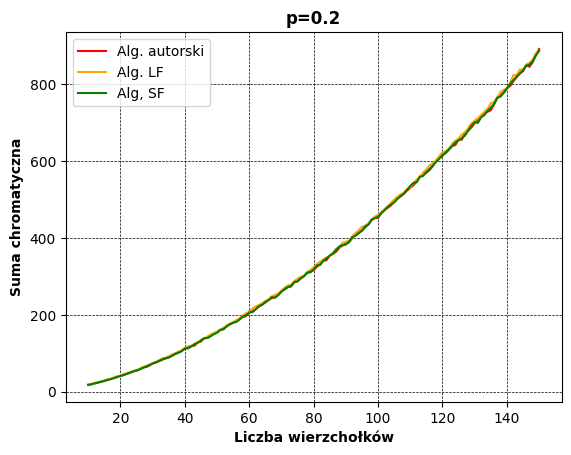

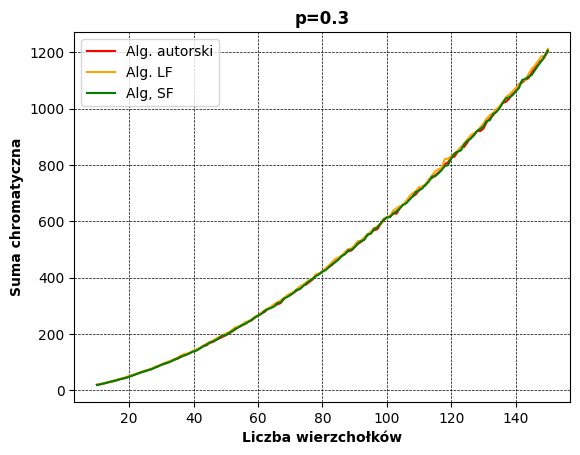

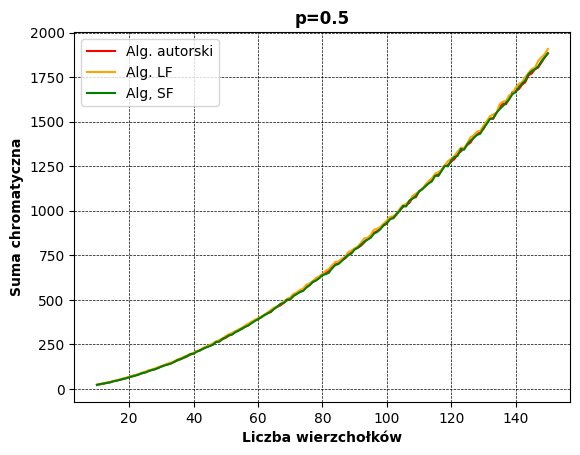

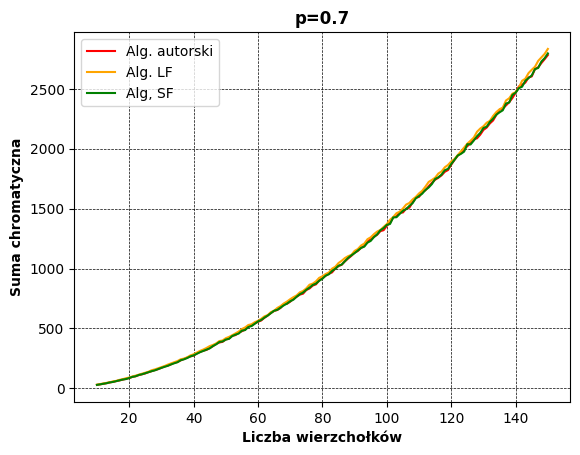

In [17]:
c=["red", "orange", "green", "blue"]
l=["Alg. autorski", "Alg. LF", "Alg, SF", "ograniczenie teoretyczne"]
for a in range(len(p)):
    for b in range(3):
        plt.plot(X, column(test_data1, a, b, L), color =c[b], label=l[b])
        
    title_string="p="+ str(p[a])
    plt.title(title_string, fontweight='bold')
    plt.xlabel('Liczba wierzchołków', fontweight='bold')
    plt.ylabel('Suma chromatyczna', fontweight='bold')
    plt.legend()
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    name=".\images\plot_p"+str(a)+"_t"+str(num_of_trials)+"v3"
    plt.savefig(name)
    plt.show()